## Kickstarter Project (Machine Learning Project) - October 2023

<a id='about'/>

### About this file

Kickstarter is a popular crowdfunding platform that has helped thousands of entrepreneurs and creators bring their innovative ideas to life. However, not all Kickstarter projects are successful, and understanding the factors that contribute to success or failure can be valuable for both creators and investors alike.

In this dataset, we have collected information on a large number of Kickstarter projects and whether they ultimately succeeded or failed to meet their funding goals. This dataset includes a wide range of project types, including technology startups, creative arts endeavors, and social impact initiatives, among others.

By analyzing this dataset, researchers and analysts can gain insights into the characteristics of successful and unsuccessful Kickstarter projects, such as funding targets, project categories, and funding sources. This information can be used to inform investment decisions and guide future crowdfunding campaigns.

Overall, this dataset provides a comprehensive look at the Kickstarter ecosystem and can serve as a valuable resource for anyone interested in understanding the dynamics of crowdfunding and the factors that contribute to project success or failure.

### TOC (table of content)
0. [About this file](#about)
1. [Load packages](#loading_packages)
2. [Load data](#data_loading)
3. [EDA technical](#EDA_technical)
4. [EDA information](#EDA_info)
5. [Feature engineering](#feature_engineering)
6. [Dummy Classifier](#dummy)
7. [Pipeline + ColumnTransformer](#pipeline)
8. [Evaluation](#evaluation)
9. [Additional Links](#links)
---
10. [Cross-validation](#crossval)
11. [GridSearchCV](#gridsearch)
12. [Set Kaggle solution](#kaggle)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter
import pandas as pd

In [2]:
kickstarter = pd.read_csv('data/kickstarter_projects.csv')

In [3]:
kickstarter.head(20)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful
6,830477146,Web Site for Short Horror Film,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed
7,266044220,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful
8,1502297238,Produce a Play (Canceled),Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,Canceled
9,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed


In [4]:
kickstarter.shape

(374853, 11)

In [5]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [6]:
kickstarter.describe(include='all')

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
count,3.748530e+05,374853,374853,374853,374853,374853,374853,3.748530e+05,3.748530e+05,374853.000000,374853
unique,NaN,372061,15,159,22,374297,3164,NaN,NaN,NaN,5
top,NaN,New EP/Music Development,Film & Video,Product Design,United States,2014-06-06 16:16:32,2014-08-08,NaN,NaN,NaN,Failed
freq,NaN,13,62694,22310,292618,2,702,NaN,NaN,NaN,197611
mean,1.074656e+09,NaN,NaN,NaN,NaN,NaN,NaN,4.586378e+04,9.121073e+03,106.690359,NaN
std,6.191377e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.158778e+06,9.132054e+04,911.718520,NaN
min,5.971000e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN
25%,5.380728e+08,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03,3.100000e+01,2.000000,NaN
50%,1.075300e+09,NaN,NaN,NaN,NaN,NaN,NaN,5.500000e+03,6.250000e+02,12.000000,NaN
75%,1.610149e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+04,4.051000e+03,57.000000,NaN


In [7]:
kickstarter['State'].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

In [8]:
kickstarter[kickstarter['State'] == 'Live'].value_counts().shape

(2798,)

In [9]:
kickstarter.State.value_counts() / len(kickstarter) * 100

State
Failed        52.716932
Successful    35.707597
Canceled      10.337652
Live           0.746426
Suspended      0.491393
Name: count, dtype: float64

In [10]:
kickstarter.Country.value_counts() / len(kickstarter) * 100

Country
United States     78.062067
United Kingdom     8.982454
Canada             3.936476
Australia          2.091220
Germany            1.112703
France             0.784041
Italy              0.767768
Netherlands        0.765100
Spain              0.607171
Sweden             0.468717
Mexico             0.467383
New Zealand        0.386018
Denmark            0.296916
Ireland            0.216351
Switzerland        0.202746
Norway             0.188874
Hong Kong          0.164865
Belgium            0.164598
Austria            0.159262
Singapore          0.148058
Luxembourg         0.016540
Japan              0.010671
Name: count, dtype: float64

In [11]:
kickstarter[kickstarter['State'] == 'Successful']

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful
7,266044220,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful
10,469734648,kicey to iceland,Photography,Photography,United States,2009-04-29 06:43:44,2009-06-17,350,1630,31,Successful
...,...,...,...,...,...,...,...,...,...,...,...
374310,749399445,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,Successful
374400,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,Successful
374458,1411606124,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,Successful
374530,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,Successful


In [12]:
kickstarter.query("State == 'Successful' and Goal > Pledged")

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
258920,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Film & Video,Shorts,United States,2015-11-12 19:06:18,2015-12-27,36000,30716,275,Successful
272350,780863434,TUW Ruhla Watches - Comeback of a Legend,Design,Product Design,Germany,2016-02-08 19:14:02,2016-03-19,27885,27765,90,Successful


In [13]:
successful_smaller_pledged = kickstarter[(kickstarter['State'] == 'Successful') & (kickstarter['Pledged'] < kickstarter['Goal'])]
successful_smaller_pledged


,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
258920,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Film & Video,Shorts,United States,2015-11-12 19:06:18,2015-12-27,36000,30716,275,Successful
272350,780863434,TUW Ruhla Watches - Comeback of a Legend,Design,Product Design,Germany,2016-02-08 19:14:02,2016-03-19,27885,27765,90,Successful


In [14]:
kickstarter.query("State == 'Failed' and Goal < Pledged")

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
2295,2103203254,The new face of Canadian Science Fiction,Publishing,Fiction,United States,2010-03-18 04:35:31,2010-05-16,10000,10797,66,Failed
33823,1297794474,Music Empowers - A Day with the Accende Ensemble,Music,Classical Music,United States,2011-11-07 15:20:24,2012-01-04,3000,3088,20,Failed
86441,1085047405,"""Balance""",Music,Jazz,United States,2013-03-05 10:55:56,2013-04-04,23000,23020,141,Failed
108392,59246799,Key Wrench - Unlock Your Life!,Design,Product Design,United States,2013-08-24 05:42:10,2013-10-04,6000,6183,208,Failed


In [15]:
kickstarter.query("State == 'Canceled' and Goal < Pledged")

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
58,981182186,Save the Ramzi (Canceled),Music,Music,United States,2009-05-14 22:27:25,2009-06-15,1000,1190,18,Canceled
1106,1449241552,Help Sex Piano Fund an EP (Canceled),Music,Rock,United States,2009-11-30 02:32:24,2010-02-15,750,1110,32,Canceled
3255,633651514,Tiny Urban Park (Canceled),Food,Food,United States,2010-05-04 02:17:08,2010-05-18,650,1260,39,Canceled
6152,384291751,Pieces of My Soul: Scattered Around Chicago. (...,Photography,Photography,United States,2010-08-02 05:21:55,2010-10-31,60,160,4,Canceled
7604,26343338,Microfiche releasing Jetpacks and Laser Beams ...,Music,Rock,United States,2010-09-17 07:15:02,2010-10-23,1500,1905,24,Canceled
...,...,...,...,...,...,...,...,...,...,...,...
373114,1953573084,Love Tove,Games,Tabletop Games,Sweden,2017-12-11 02:21:35,2018-01-10,3085,17433,371,Canceled
373240,2102787667,Super Fun Awesome Time,Games,Tabletop Games,United States,2017-12-11 22:20:28,2018-01-25,1000,1729,11,Canceled
373378,728624654,ARTOFPXL VOL.1 // WEEKLY PLANNER 2018,Design,Design,Germany,2017-12-12 21:02:21,2018-01-03,669,742,10,Canceled
373911,957218473,The Dumbest Thing In Your Mailbox - Part 5: Ye...,Art,Art,United States,2017-12-18 21:38:26,2017-12-25,1,74,17,Canceled


In [16]:
kickstarter.columns

Index(['ID', 'Name', 'Category', 'Subcategory', 'Country', 'Launched',
       'Deadline', 'Goal', 'Pledged', 'Backers', 'State'],
      dtype='object')

<Axes: ylabel='Category'>

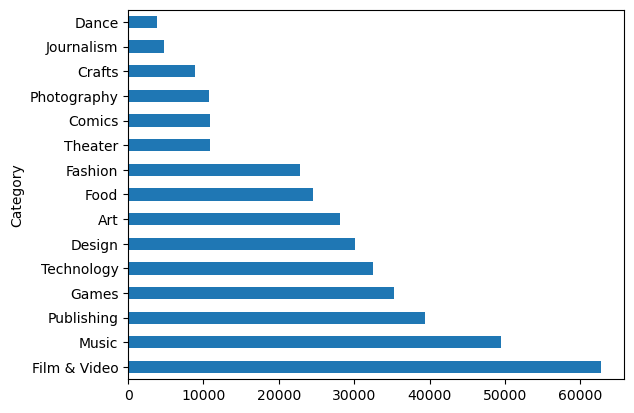

In [17]:
(kickstarter['Category'].value_counts().plot(kind='barh'))

/Users/paulkotyrba/miniforge3/envs/ds-kickstarter/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


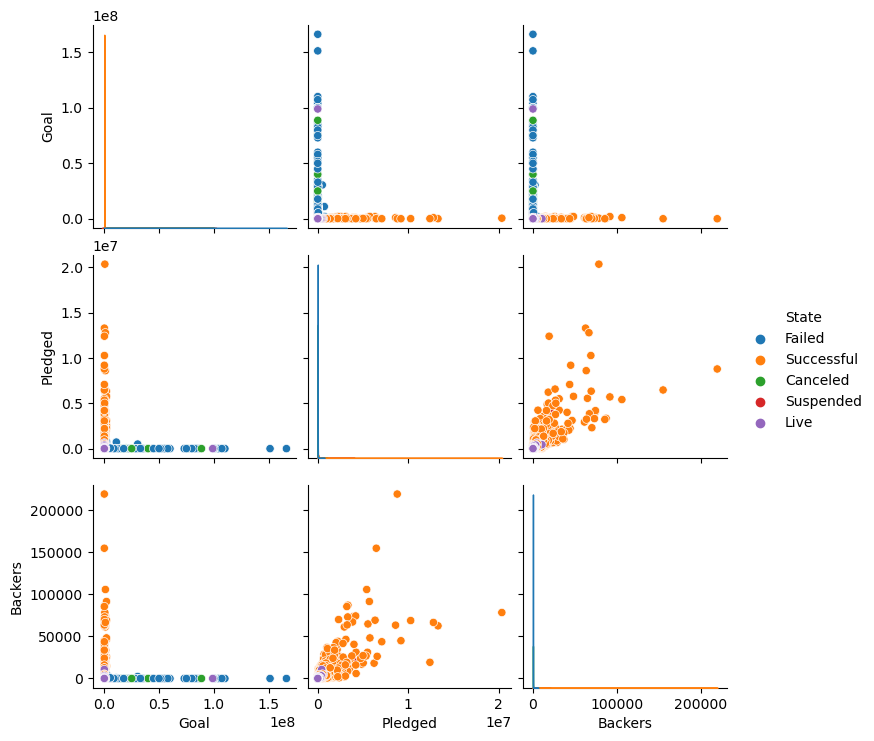

In [18]:
sns.pairplot(data=kickstarter, vars=['Goal', 'Pledged', 'Backers'], hue='State')

#### Columns:

- 'ID':             ID
- 'Name':           Name
- 'Category':       Category
- 'Subcategory':    Subcategory
- 'Country':        Country of product origin
- 'Launched':       Date the project was launched
- 'Deadline':       Deadline for crowdfunding
- 'Goal':           Amount of money the creater needs to complete the project (USD)
- 'Pledged':        Amount of money pledged to by the crowd (USD)
- 'Backers':        Number of backers
- 'State':          Current condition the project is in (as of 2018-01-02) ('Failed', 'Successful', 'Canceled', 'Suspended', 'Live')

<Axes: xlabel='Goal'>

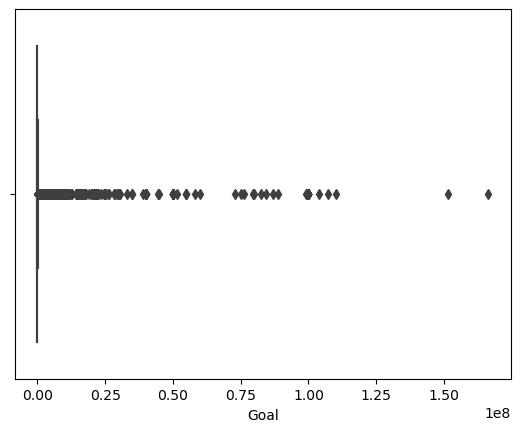

In [19]:
sns.boxplot(data=kickstarter, x='Goal')

In [20]:
kickstarter.query("State == 'Successful' and Goal > 1000000")

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
68784,458565935,Project Eternity,Games,Video Games,United States,2012-09-14 19:01:04,2012-10-17,1100000,3986929,73986,Successful
74269,880009511,Elite: Dangerous,Games,Video Games,United Kingdom,2012-11-06 01:00:57,2013-01-05,2015609,2545014,25681,Successful
87484,1755266685,The Veronica Mars Movie Project,Film & Video,Narrative Film,United States,2013-03-13 15:42:22,2013-04-13,2000000,5702153,91585,Successful
90001,1682353635,Camelot Unchained,Games,Video Games,United States,2013-04-02 17:56:11,2013-05-02,2000000,2232933,14873,Successful
92941,1871494789,WISH I WAS HERE,Film & Video,Narrative Film,United States,2013-04-24 11:57:04,2013-05-24,2000000,3105473,46520,Successful
104397,1567218706,The Newest Hottest Spike Lee Joint,Film & Video,Narrative Film,United States,2013-07-22 18:15:41,2013-08-21,1250000,1418910,6421,Successful
115172,1719494931,Obduction,Games,Video Games,United States,2013-10-17 15:06:31,2013-11-16,1100000,1321306,22195,Successful
138030,721748605,Blue Mountain State: The Movie,Film & Video,Narrative Film,United States,2014-04-15 14:43:13,2014-05-15,1500000,1911827,23999,Successful
227382,788486889,The Bards Tale IV,Games,Video Games,United States,2015-06-02 14:57:26,2015-07-11,1250000,1519681,33741,Successful
230354,947809001,Shenmue 3,Games,Video Games,United States,2015-06-16 03:51:04,2015-07-18,2000000,6333296,69320,Successful


In [21]:
kickstarter.query("State != 'Successful' and Goal > 5_000_000")

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
5324,1757240656,Help erase the national debt of the USA,Journalism,Journalism,United States,2010-07-09 03:48:06,2010-10-03,21474836,181,8,Failed
6019,577025692,Legend of The Stolen Guitar,Film & Video,Film & Video,United States,2010-07-29 22:33:00,2010-10-21,21474836,0,0,Failed
7216,974997366,TRONICA EVOLUTION. Blogger. Superhero. Mother.,Film & Video,Film & Video,United States,2010-09-06 07:12:12,2010-12-05,20000000,0,0,Failed
14157,259750842,JUST LIKE MARILYN: THE HOLLYWOOD HITS,Film & Video,Film & Video,United States,2011-02-11 09:14:48,2011-05-13,7994642,0,0,Failed
17274,1885130931,Help a Regular Fan Buy the New York Mets (Canc...,Games,Games,United States,2011-04-01 00:54:32,2011-06-30,21474836,3,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...
360946,1078377092,0XYZ,Journalism,Video,United States,2017-09-18 19:17:53,2017-11-17,10000000,10,1,Failed
362508,1990248041,Save the Malibu Playhouse,Theater,Spaces,United States,2017-09-29 19:40:17,2017-11-13,5500000,100,1,Failed
369259,868627611,Fatal Retribution,Film & Video,Thrillers,United Kingdom,2017-11-13 01:22:59,2018-01-01,8808543,27,2,Failed
371164,1321011533,Mirror,Film & Video,Thrillers,United States,2017-11-24 19:46:19,2018-01-03,99000000,0,0,Live


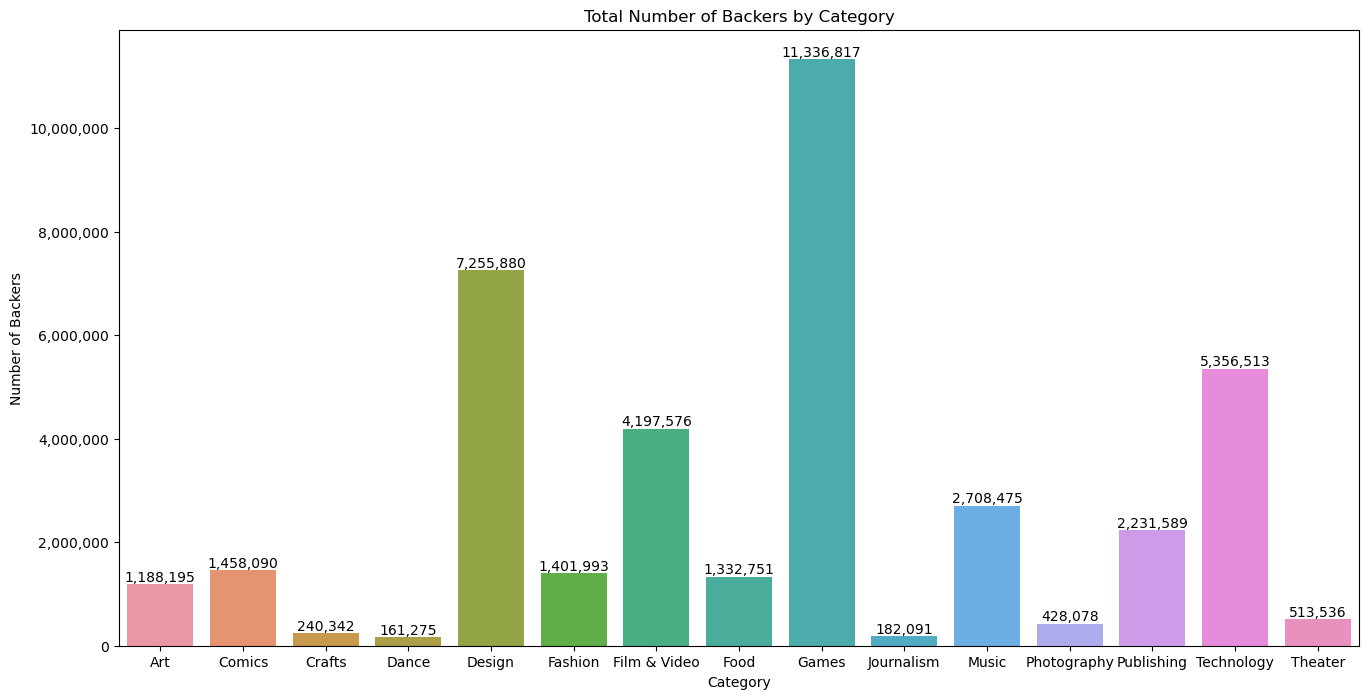

In [22]:
backers_by_category = kickstarter.groupby('Category')['Backers'].sum().reset_index()
fig = plt.figure(figsize=(16, 8))
backers_by_category = kickstarter.groupby('Category')['Backers'].sum().reset_index()

# Create a bar plot using Seaborn
sns.barplot(x='Category', y='Backers', data=backers_by_category)

# Set the title and axis labels
plt.title('Total Number of Backers by Category')
plt.xlabel('Category')
plt.ylabel('Number of Backers')

# Format y-axis ticks to show the actual number of backers
def format_ticks(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

# Add total number of backers on top of each bar
for index, row in backers_by_category.iterrows():
    plt.annotate(f'{int(row["Backers"]):,}', xy=(index, row['Backers']), ha='center', va='bottom')

# Show the plot
plt.show()
plt.show()

In [23]:
kickstarter.isnull().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [24]:
country_counts = kickstarter.groupby('Country')['Category'].count().reset_index()

# Load a world map GeoDataFrame
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the project counts with the world map GeoDataFrame
merged_data = world_map.merge(country_counts, how='left', left_on='name', right_on='Country')

# Create a choropleth map with Plotly
fig = px.choropleth(merged_data, 
                    locations='iso_a3', 
                    color='Category', 
                    hover_name='name',
                    title='Number of Projects by Country')

# Show the plot
fig.show()

NameError: name 'gpd' is not defined

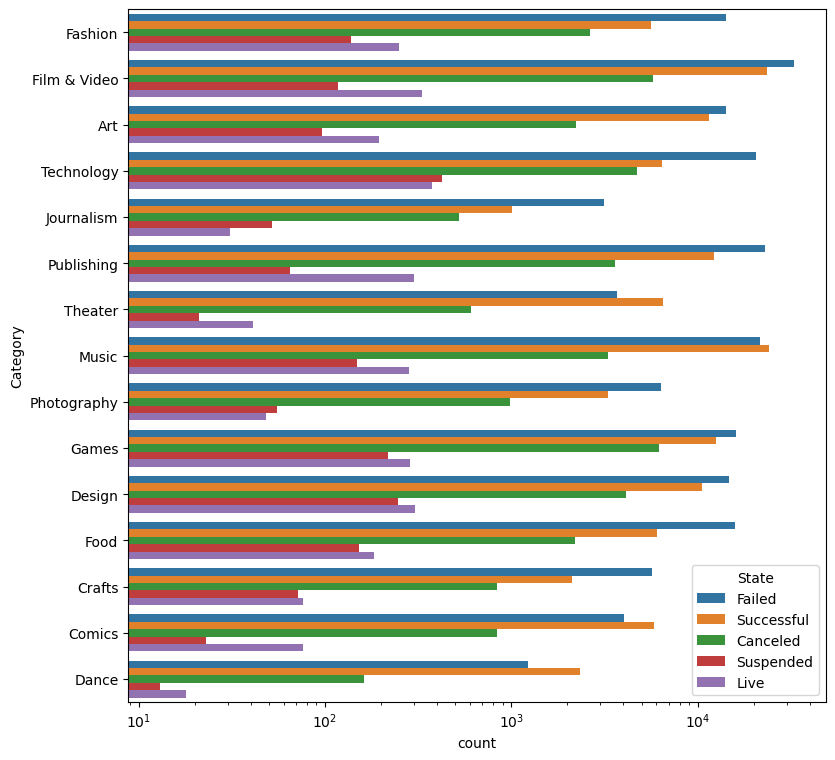

In [ ]:
plt.figure(figsize=(9, 9))
sns.countplot(kickstarter, y='Category', hue='State')
plt.xscale('log')

In [ ]:
fail_or_success = kickstarter.query("State == 'Successful' or State == 'Failed'")

<Axes: xlabel='count', ylabel='Category'>

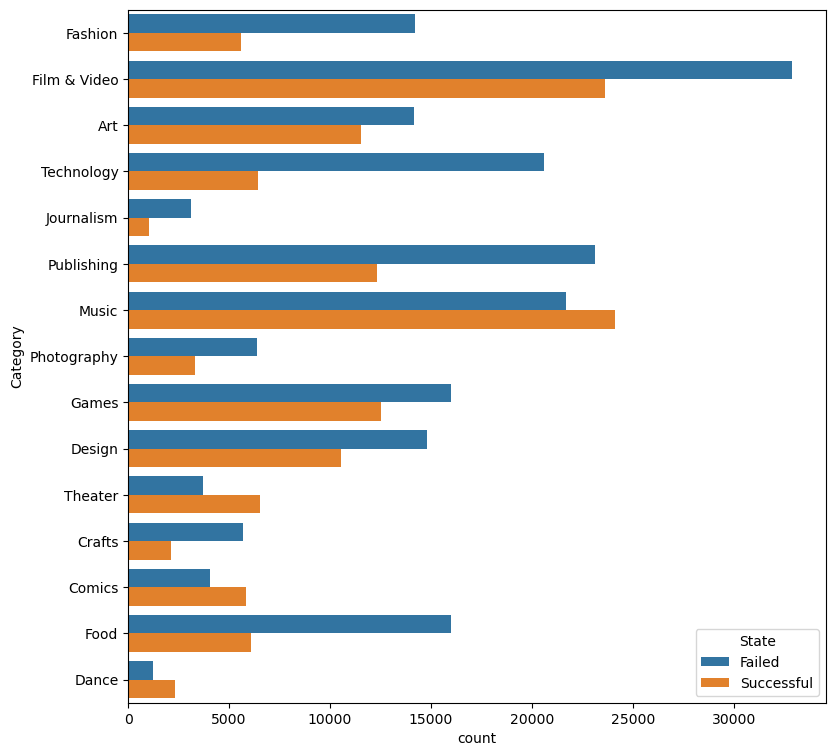

In [ ]:
plt.figure(figsize=(9, 9))
sns.countplot(fail_or_success, y='Category', hue='State')

<Axes: xlabel='count', ylabel='Category'>

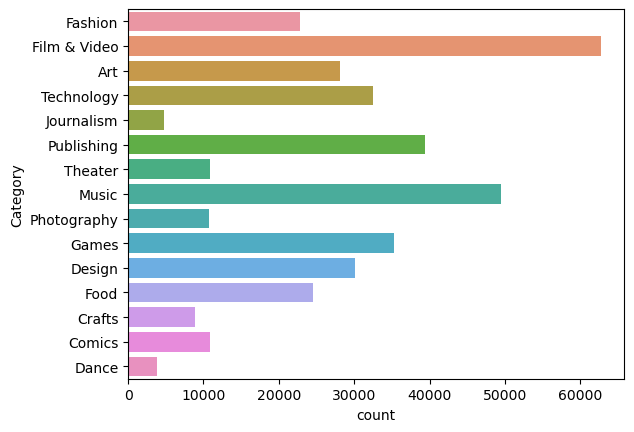

In [ ]:
sns.countplot(kickstarter, y='Category')

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming you have a DataFrame named 'kickstarter' with a 'Country' column
# Replace 'kickstarter' with your actual DataFrame name
# You might need to clean the 'Country' column if it contains any inconsistencies

# Group the data by 'Country' and count the number of projects in each country
country_counts = kickstarter['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Project Count']

# Use Plotly Express to create an interactive world map
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Project Count",
    hover_name="Country",
    title="Kickstarter Projects by Country",
    color_continuous_scale=px.colors.sequential.Plasma,  # Choose a color scale
)

# Customize the map layout
fig.update_geos(
    projection_scale=1,  # Adjust the map scale
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgrey",
)

# Show the interactive map
fig.show()


In [ ]:
kickstarter.shape

(374853, 11)

In [ ]:
df_new = pd.read_csv('data/Kickstarter_2023-09-14T03_20_28_258Z/Kickstarter.csv')

In [ ]:
df_new.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
0,52,ICS needs your help getting the Hirajeta Tarot...,"{""id"":54,""name"":""Mixed Media"",""analytics_name""...",3032.0,US,the United States,1358744601,"{""id"":1806672967,""name"":""Danny Hirajeta"",""slug...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1363668488,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,3032.000000,international
1,609,I’ve created a huge map of Post-Apocalyptic Se...,"{""id"":54,""name"":""Mixed Media"",""analytics_name""...",18386.0,US,the United States,1355767056,"{""id"":1743163018,""name"":""Tony Dowler"",""slug"":""...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1361853081,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,18386.740000,international
2,53,Help Lou boost her upcycling business that wil...,"{""id"":54,""name"":""Mixed Media"",""analytics_name""...",1610.0,US,the United States,1358731293,"{""id"":1658130628,""name"":""S. Lou Leelyn"",""is_re...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1360524238,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,1610.000000,international
3,204,Making as many birds into fat birds as possible!,"{""id"":262,""name"":""Accessories"",""analytics_name...",10299.0,AU,Australia,1616752854,"{""id"":1722363258,""name"":""Lauren Steele"",""slug""...",AUD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1619830812,0.761938,"{""web"":{""project"":""https://www.kickstarter.com...",0.778031,10086.022818,international
4,39,"The safe, convenient, and stylish way to prope...","{""id"":263,""name"":""Apparel"",""analytics_name"":""A...",10059.0,US,the United States,1601910820,"{""id"":1065587430,""name"":""Kamili Activewear"",""s...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1620069281,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,10059.000000,international


In [ ]:
df_new.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_exchange_rate',
       'usd_pledged', 'usd_type'],
      dtype='object')